# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [2]:
    data = pd.read_csv("breast-cancer-wisconsin-data.csv")
data.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [3]:
#Delete the "id" column
data.drop("ID",axis=1,inplace=True)


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [4]:
data.dtypes
data.head()
data.tail()
data.shape
data.dtypes
data.info
data.describe()
data.describe().transpose()

ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4
698,4,8,8,5,4,5,10,4,1,4


(699, 10)

ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

<bound method DataFrame.info of      ClumpThickness  Cell Size  Cell Shape  Marginal Adhesion  \
0                 5          1           1                  1   
1                 5          4           4                  5   
2                 3          1           1                  1   
3                 6          8           8                  1   
4                 4          1           1                  3   
5                 8         10          10                  8   
6                 1          1           1                  1   
7                 2          1           2                  1   
8                 2          1           1                  1   
9                 4          2           1                  1   
10                1          1           1                  1   
11                2          1           1                  1   
12                5          3           3                  3   
13                1          1           1                

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


,count,mean,std,min,25%,50%,75%,max
ClumpThickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [5]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

data.isnull().values.any()
data.isnull().sum().sum()
data.isna().values.any()
data.isna().sum().sum()


False

0

False

0

In [6]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
data['Bare Nuclei'].value_counts()


1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [7]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values
data['Bare Nuclei'].replace('?', np.nan, inplace=True)
data.isna().sum().sum()

16

In [8]:
data['Bare Nuclei']=data['Bare Nuclei'].replace(np.nan, data['Bare Nuclei'].median() )
data.isnull().values.any()
data.isnull().sum().sum()
data.isna().values.any()
data.isna().sum().sum()


False

0

False

0

In [9]:
data['Bare Nuclei']=data['Bare Nuclei'].astype('float64').astype('int64')

In [10]:
data.dtypes
data.isnull().values.any()
data.isnull().sum().sum()
data.isna().values.any()
data.isna().sum().sum()


ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

False

0

False

0

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
data.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Cell Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Cell Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Normal Nucleoli,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


In [13]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

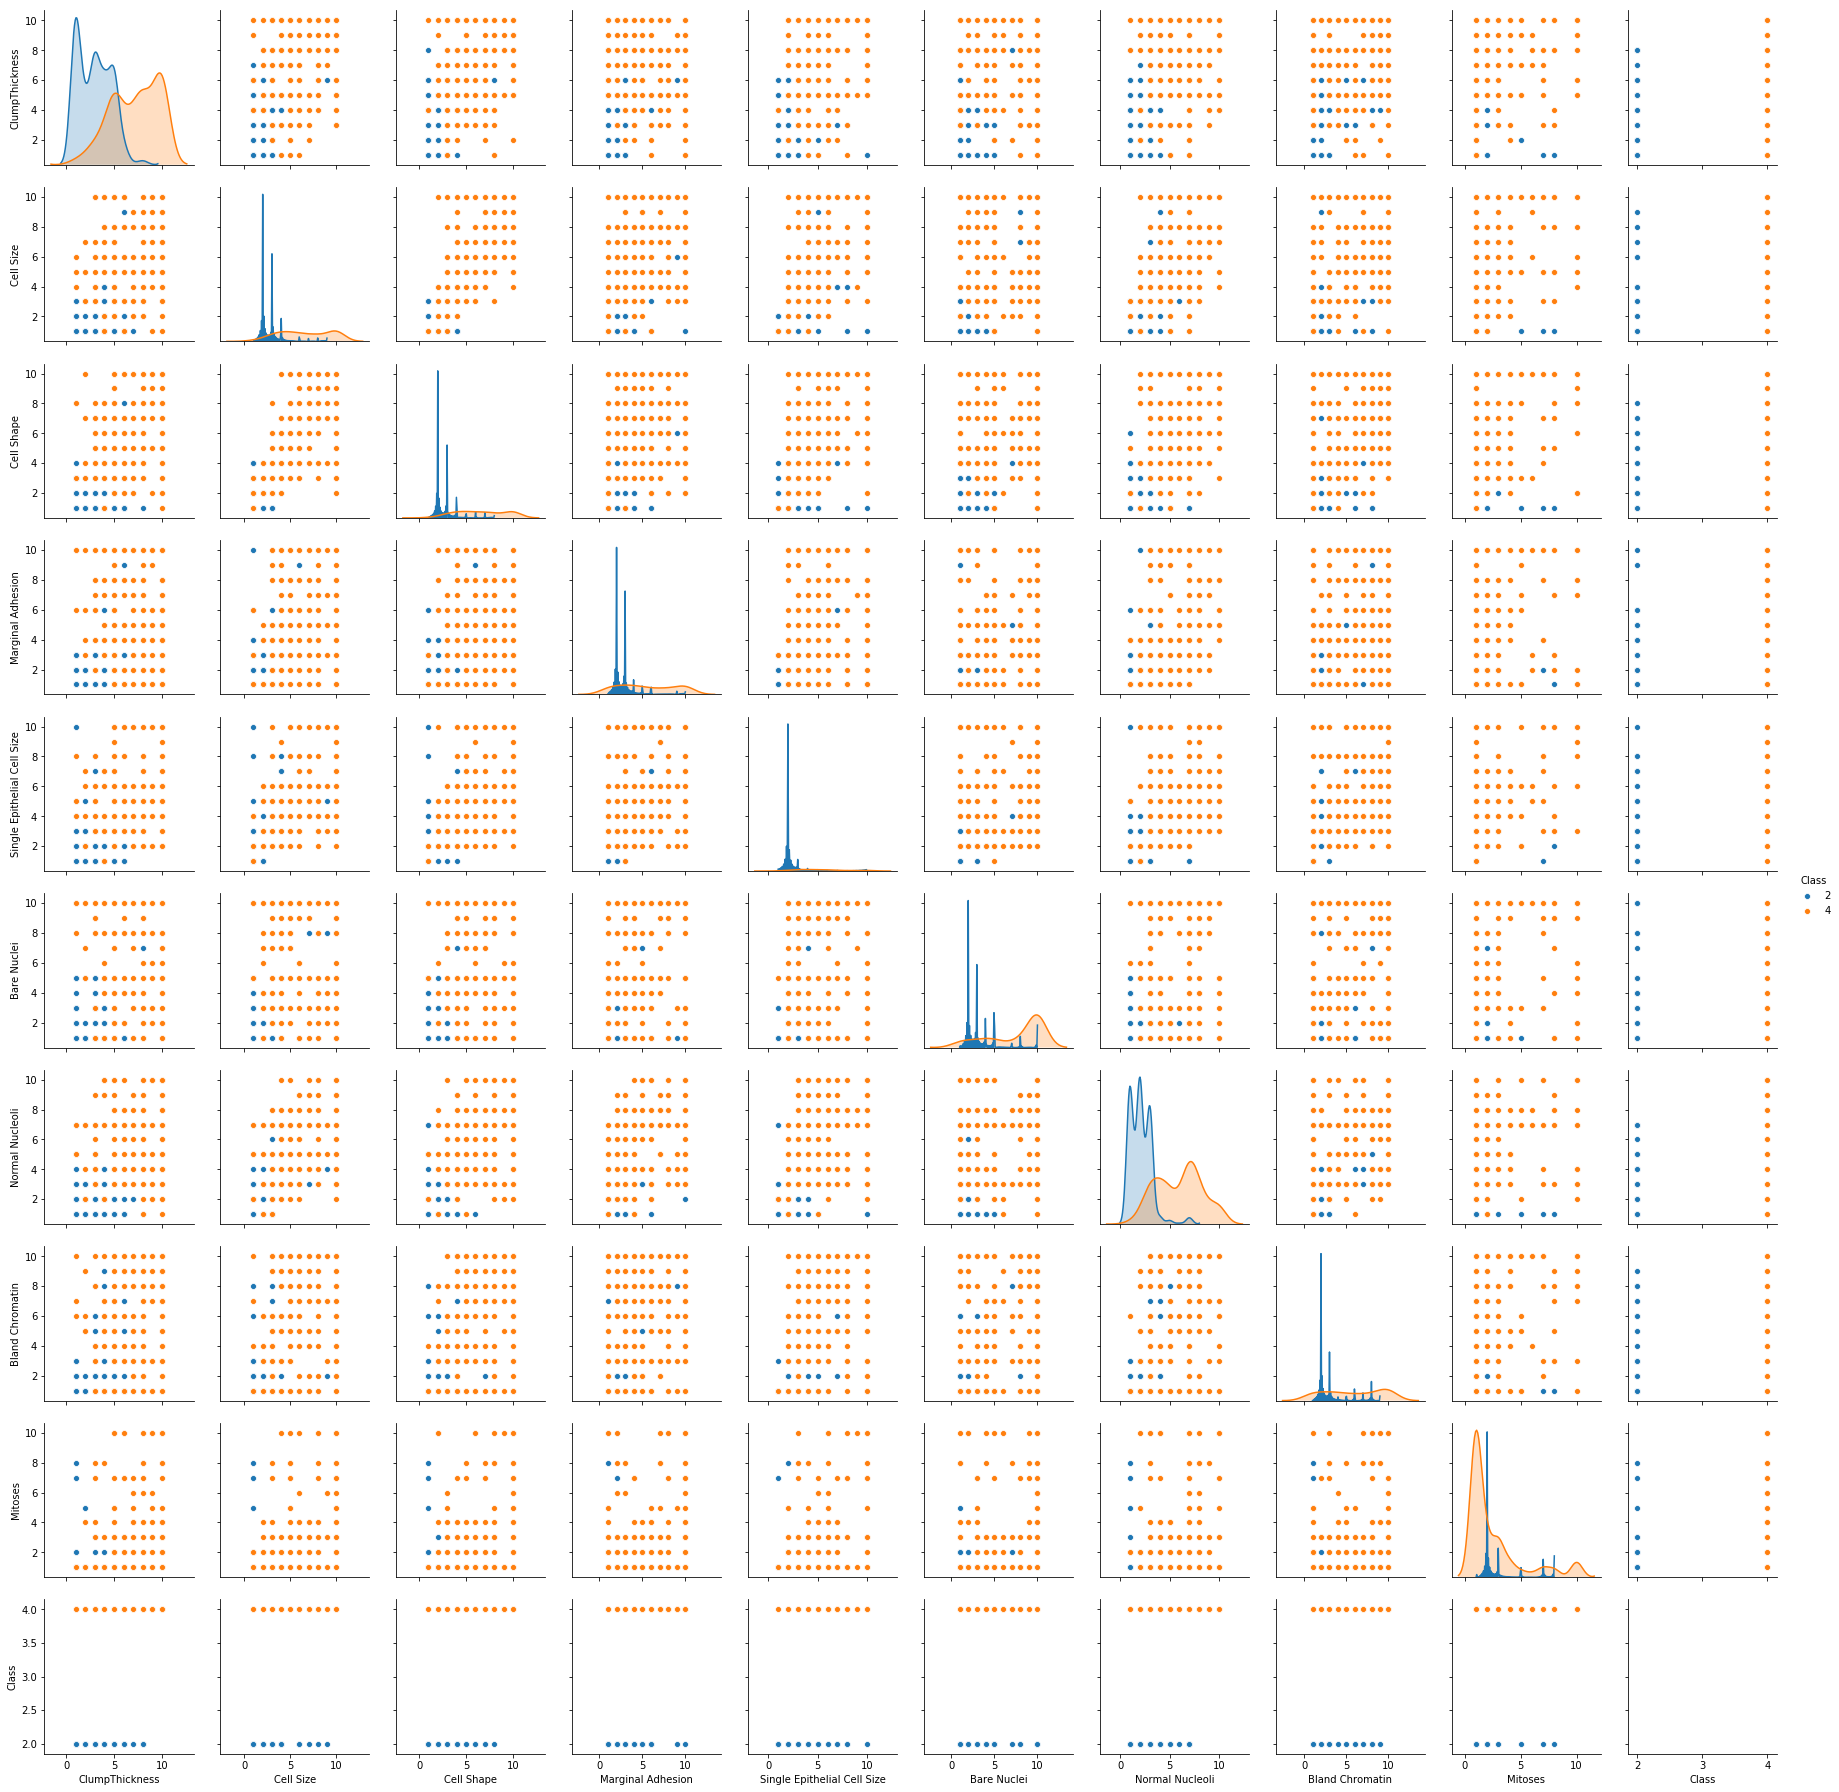

In [14]:
#Let us check for pair plots
# Check for correlation of variable
sns.pairplot(data,diag_kind='kde', hue="Class")

In [15]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [16]:
# We could see most of the outliers are now removed.
data.var() > 0.1

ClumpThickness                 True
Cell Size                      True
Cell Shape                     True
Marginal Adhesion              True
Single Epithelial Cell Size    True
Bare Nuclei                    True
Normal Nucleoli                True
Bland Chromatin                True
Mitoses                        True
Class                          True
dtype: bool

In [17]:
from scipy.stats import zscore
data_z = data.apply(zscore)  # convert all attributes to Z scale 

data_z.describe()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,6.990000e+02,6.990000e+02,6.990000e+02,6.990000e+02,6.990000e+02,6.990000e+02,6.990000e+02,6.990000e+02,6.990000e+02
mean,1.655011e-16,-2.801765e-16,-5.854481e-16,-1.477121e-16,-1.021199e-15,7.026648e-16,6.251556e-16,3.874662e-16,7.093356e-16,8.697541e-16
std,1.000716e+00,1.000716e+00,1.000716e+00,1.000716e+00,1.000716e+00,1.000716e+00,1.000716e+00,1.000716e+00,1.000716e+00,1.000716e+00
min,-1.214667e+00,-6.999951e-01,-7.432990e-01,-6.332472e-01,-1.001495e+00,-6.869792e-01,-1.000471e+00,-6.118250e-01,-3.439118e-01,-7.253970e-01
25%,-8.592662e-01,-6.999951e-01,-7.432990e-01,-6.332472e-01,-5.495614e-01,-6.869792e-01,-5.900668e-01,-6.118250e-01,-3.439118e-01,-7.253970e-01
50%,-1.484649e-01,-6.999951e-01,-7.432990e-01,-6.332472e-01,-5.495614e-01,-6.869792e-01,-1.796621e-01,-6.118250e-01,-3.439118e-01,-7.253970e-01
75%,5.623364e-01,6.117919e-01,6.035993e-01,4.181537e-01,3.543054e-01,4.181956e-01,6.411472e-01,3.713145e-01,-3.439118e-01,1.378555e+00
max,1.983939e+00,2.251526e+00,2.287222e+00,2.520955e+00,3.065906e+00,1.799664e+00,2.693171e+00,2.337594e+00,4.907421e+00,1.378555e+00


In [18]:
from scipy import stats
data_z=data_z[(np.abs(data_z) < 3).all(axis=1)]

In [19]:
data_z.shape

(648, 10)

# Q6 Create a covariance matrix for identifying Principal components

In [20]:
# PCA
# Step 1 - Create covariance matrix
X = data_z.drop('Class', axis=1)
Y = data_z[['Class']]
X.shape
Y.shape

(648, 9)

(648, 1)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 10)

In [22]:
cov_matrix = np.cov(X_train.T)
print('Covariance Matrix \n%s', cov_matrix)



Covariance Matrix 
%s [[0.92419456 0.54204962 0.54754764 0.43942838 0.35178627 0.53937635
  0.5001791  0.4760281  0.14473196]
 [0.54204962 0.83061078 0.75359876 0.60051329 0.49501835 0.59928663
  0.62893389 0.58693783 0.16152206]
 [0.54754764 0.75359876 0.8371393  0.57809606 0.48080062 0.61138143
  0.61798336 0.60154767 0.14497191]
 [0.43942838 0.60051329 0.57809606 0.88195075 0.42358127 0.63810697
  0.56869748 0.51629823 0.15740334]
 [0.35178627 0.49501835 0.48080062 0.42358127 0.55815422 0.4413409
  0.43642852 0.45989464 0.13176564]
 [0.53937635 0.59928663 0.61138143 0.63810697 0.4413409  0.9336053
  0.59545291 0.51123051 0.16209653]
 [0.5001791  0.62893389 0.61798336 0.56869748 0.43642852 0.59545291
  0.88576702 0.57259696 0.11899316]
 [0.4760281  0.58693783 0.60154767 0.51629823 0.45989464 0.51123051
  0.57259696 0.85742098 0.15203072]
 [0.14473196 0.16152206 0.14497191 0.15740334 0.13176564 0.16209653
  0.11899316 0.15203072 0.18098266]]


# Q7 Identify eigen values and eigen vector

In [23]:
# Step 2- Get eigen values and eigen vector

In [24]:

e_vals, e_vecs = np.linalg.eig(cov_matrix)

print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Eigenvectors 
[[-0.32614576  0.90003035 -0.0973842   0.0013105  -0.08388873  0.12101563
  -0.20255551  0.0927871  -0.05261788]
 [-0.38372153 -0.05120041  0.17758367  0.71217884  0.14913743 -0.12028856
  -0.0594727  -0.5205911  -0.01175771]
 [-0.38296751 -0.01694707  0.19981825 -0.66199434 -0.07704979 -0.33739312
   0.04666964 -0.50247745 -0.02126995]
 [-0.3535966  -0.36999571 -0.44893537 -0.05637685 -0.10848845  0.05212548
  -0.67659128  0.10596972 -0.22329164]
 [-0.27380993 -0.15373855  0.19142095 -0.06235692 -0.26364767  0.80276652
   0.27741532 -0.09015938 -0.24865652]
 [-0.37096394 -0.04762173 -0.61384276  0.07759077 -0.02677104 -0.20776018
   0.64191808  0.14259374 -0.03196708]
 [-0.3652535  -0.11934711  0.0979436  -0.05939828  0.13158048  0.17947496
  -0.06088691  0.21688022  0.85962556]
 [-0.34690355 -0.09914046  0.54189422  0.0753937  -0.03718468 -0.312424
   0.04677117  0.6163855  -0.298974  ]
 [-0.09139879  0.01280364 -0.02868544 -0.17962084  0.92956516  0.19213618
   0.02382

# Q8 Find variance and cumulative variance by each eigen vector

In [25]:
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Variance Explained", var_exp)


Variance Explained [68.17534898860373, 7.214572792063145, 6.344073036470675, 4.4031234853997026, 4.250766850715877, 3.7341589118304293, 2.878804595820411, 1.9183424282343102, 1.080808910861717]


In [26]:
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 68.17534899  75.38992178  81.73399482  86.1371183   90.38788515
  94.12204407  97.00084866  98.91919109 100.        ]


# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

<Figure size 720x360 with 0 Axes>

<BarContainer object of 9 artists>

Text(0, 0.5, 'Explained Variance Ratio')

Text(0.5, 0, 'Principal Components')

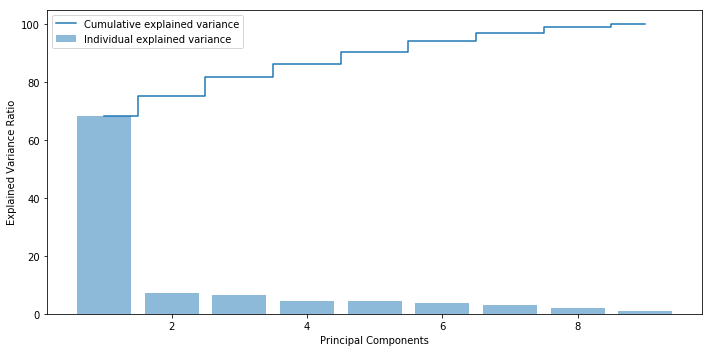

In [27]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(X_train)
pca.components_

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

array([[ 0.32614576,  0.38372153,  0.38296751,  0.3535966 ,  0.27380993,
         0.37096394,  0.3652535 ,  0.34690355,  0.09139879],
       [-0.90003035,  0.05120041,  0.01694707,  0.36999571,  0.15373855,
         0.04762173,  0.11934711,  0.09914046, -0.01280364],
       [-0.0973842 ,  0.17758367,  0.19981825, -0.44893537,  0.19142095,
        -0.61384276,  0.0979436 ,  0.54189422, -0.02868544],
       [-0.05261788, -0.01175771, -0.02126995, -0.22329164, -0.24865652,
        -0.03196708,  0.85962556, -0.298974  , -0.23577114],
       [ 0.0927871 , -0.5205911 , -0.50247745,  0.10596972, -0.09015938,
         0.14259374,  0.21688022,  0.6163855 ,  0.03510683]])

# Q10 Find correlation between components and features

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2467f959358>)

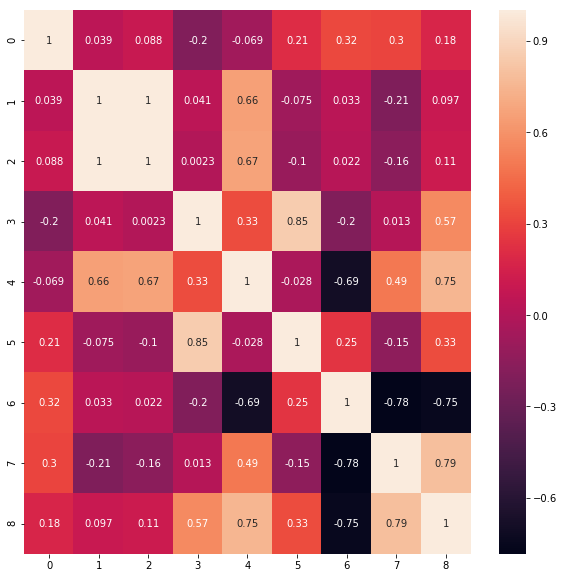

In [29]:
import matplotlib.pyplot as plt 
corrmat = pd.DataFrame(pca.components_).corr()
plt.subplots(figsize = (10,10))
sns.heatmap(corrmat, annot=True)

In [30]:
corrmat = pd.DataFrame(pca.components_)
corrmat.columns = X_train.columns
corrmat

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.326146,0.383722,0.382968,0.353597,0.273810,0.370964,0.365254,0.346904,0.091399
1,-0.900030,0.051200,0.016947,0.369996,0.153739,0.047622,0.119347,0.099140,-0.012804
2,-0.097384,0.177584,0.199818,-0.448935,0.191421,-0.613843,0.097944,0.541894,-0.028685
3,-0.052618,-0.011758,-0.021270,-0.223292,-0.248657,-0.031967,0.859626,-0.298974,-0.235771
4,0.092787,-0.520591,-0.502477,0.105970,-0.090159,0.142594,0.216880,0.616386,0.035107


# Content Based Recommendation System - Optional ( Q11 - Q19 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [31]:
Joke_df_1=pd.read_csv("jokes.csv")


# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [32]:
ratings=Joke_df_1.head(200)
ratings.head()
ratings.shape

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


(200, 101)

# Q22 Change the column indices from 0 to 99

In [33]:
ratings.drop("NumJokes",axis=1,inplace=True)


In [34]:
i = 0

for column in ratings:
    ratings = ratings.rename(columns={column: i})
    i = i+1

In [35]:
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [36]:
ratings=ratings.replace(99,0)

# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
ratings_diff = sc.fit_transform(ratings)

### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [39]:
top_ratings = ratings_diff.mean(axis=0)

sort_ratings_df = pd.DataFrame(top_ratings)
sort_ratings_df.sort_values(ascending = False , by=0 ).head(10)


,0
53,1.154632e-16
20,1.110223e-16
47,7.771561e-17
64,7.105427e-17
49,7.105427e-17
99,5.773160e-17
83,4.440892e-17
73,4.440892e-17
23,4.440892e-17
13,3.552714e-17
